In [1]:
import pandas as pd
import time
import datetime
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import GroupShuffleSplit

In [2]:
df = pd.read_csv("training_set_VU_DM.csv")
#df = pd.read_csv("sample_training_set.csv")

# Get a sample from the training dataset
#df = df.sample(n=500000)
#df.to_csv('sample_training_set.csv')

In [3]:
# Make a descriptive dataframe
df_descr = pd.concat([df.nunique(), df.isna().sum(), df.notna().sum(), df.dtypes, df.max(), df.min()], axis=1)
df_descr.columns = ['Unique values', 'NaN count', 'non NaN count', 'Datatype', 'Max value', 'Min value']
df_descr

,Unique values,NaN count,non NaN count,Datatype,Max value,Min value
srch_id,199795,0,4958347,int64,332785,1
date_time,198615,0,4958347,object,2013-06-30 23:58:24,2012-11-01 00:08:29
site_id,34,0,4958347,int64,34,1
visitor_location_country_id,210,0,4958347,int64,231,1
visitor_hist_starrating,312,4706481,251866,float64,5.0,1.41
visitor_hist_adr_usd,7799,4705359,252988,float64,1958.7,0.0
prop_country_id,172,0,4958347,int64,230,1
prop_id,129113,0,4958347,int64,140821,1
prop_starrating,6,0,4958347,int64,5,0
prop_review_score,10,7364,4950983,float64,5.0,0.0


In [18]:
attributes = []

for column in df.columns:
    if df[[column]].isna().sum()[0] != 0:
        attributes.append(column)
        

In [19]:
fraction_NA = []

for column in attributes:
    missing = df[[column]].isna().sum()[0]
    non_missing = df[[column]].notna().sum()[0]
    frac = missing / (non_missing + missing)
    fraction_NA.append(frac)

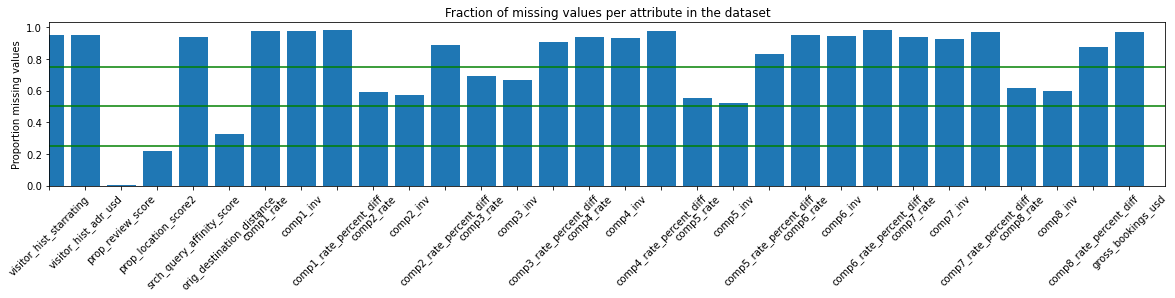

In [24]:
d = {}

d = dict(zip(attributes, fraction_NA))

centers = range(len(attributes))
plt.rcParams["figure.figsize"] = (20,3)
plt.bar(centers, d.values(), align='center', tick_label=attributes)
plt.xlim([0, len(attributes)])
plt.axhline(y = 0.25, xmin = 0, xmax = len(attributes), color = 'green')
plt.axhline(y = 0.5, xmin = 0, xmax = len(attributes), color = 'green')
plt.axhline(y = 0.75, xmin = 0, xmax = len(attributes), color = 'green')
plt.xticks(rotation = 45)
plt.ylabel("Proportion missing values")
plt.title("Fraction of missing values per attribute in the dataset")
plt.show()